In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import seaborn as sns
from datetime import datetime
import yfinance as yf
yf.pdr_override()

In [10]:
# Lista de tickers
tickers = ["PETR4.SA", 'VALE3.SA', 'ITUB4.SA', 'BBAS3.SA', 'BBDC3.SA']
# Baixando os dados dos tickers
carteira = yf.download(tickers, start="2002-01-01")['Adj Close']
# Baixando os dados do índice Ibovespa
ibov = yf.download('^BVSP', start="2002-01-01")['Adj Close']

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [20]:
def preencher_nans(df):
    # Preenche NaNs com o valor anterior (forward fill)
    df.ffill(inplace=True)
    # Para os casos onde o primeiro valor é NaN, preenche com o valor seguinte (backward fill)
    df.bfill(inplace=True)
    return df

carteiras_normalizadas = {}  # Dicionário para armazenar as carteiras de cada ano
valor_inicial = 10000  # Valor inicial para normalização

for ano in range(2002, 2024):
    # Filtrar dados do ano atual e preencher NaNs
    carteira_ano = preencher_nans(carteira[f'{ano}-01-01':f'{ano}-12-31'].copy())
    # Se for o primeiro ano, normalizar com base no primeiro valor
    if ano == 2002:
        carteira_normalizada = (carteira_ano / carteira_ano.iloc[0]) * valor_inicial
    else:        
        # Para os anos seguintes, usar o valor proporcional do final do ano anterior
        carteira_normalizada = (carteira_ano / carteira_ano.iloc[0]) * valores
    # Calcular o saldo e armazenar o valor final para o rebalanceamento no próximo ano
    carteira_normalizada['saldo'] = carteira_normalizada.sum(axis=1)
    valores = carteira_normalizada['saldo'][-1] / len(carteira_ano.columns)
    # Armazenar a carteira normalizada no dicionário
    carteiras_normalizadas[ano] = carteira_normalizada
# Concatenando todas as carteiras normalizadas em um único DataFrame
carteira_total = pd.concat(carteiras_normalizadas.values())
# Exibindo o DataFrame resultante
carteira_total


,BBAS3.SA,BBDC3.SA,ITUB4.SA,PETR4.SA,VALE3.SA,saldo
Date,,,,,,
2002-01-01,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5.000000e+04
2002-01-02,10179.415182,10000.000000,10455.142875,10019.546175,9807.689431,5.046179e+04
2002-01-03,10339.943842,10076.146776,10340.935284,10087.973717,9961.536001,5.080654e+04
2002-01-04,10103.871353,10038.071646,10171.042788,10025.413062,10173.075741,5.051147e+04
2002-01-07,9877.239868,10076.146776,10057.970752,10244.376493,10173.075741,5.042881e+04
...,...,...,...,...,...,...
2023-12-21,486956.073042,318642.921625,355682.558376,521580.285879,232360.256662,1.915222e+06
2023-12-22,488301.440499,319434.911029,361323.129710,526596.881930,230609.322819,1.926266e+06
2023-12-26,492786.231873,320708.377667,365011.175666,535053.427884,231424.429721,1.944984e+06


In [22]:
ultimo_dado_por_ano = carteira_total.groupby(carteira_total.index.year).last()
print(ultimo_dado_por_ano)

           BBAS3.SA       BBDC3.SA       ITUB4.SA       PETR4.SA  \
Date                                                               
2002    9254.014007    9708.126471    9744.877552    9071.354917   
2003   28196.006482   15185.607454   19267.269730   18957.357638   
2004   27238.084619   22725.744396   27963.768618   25577.257064   
2005   33346.500439   60070.827605   35982.343038   42425.470125   
2006   63874.165991   53583.325843   56292.254363   55236.543112   
2007   78680.832845   69616.665578   65921.793166  102362.796829   
2008   41324.246519   52659.002582   62886.414559   44412.039282   
2009   99805.088359   69871.633968   71299.015974   74747.205471   
2010   94242.449546   81892.554759   79288.985499   59719.477250   
2011   69859.138852   81152.440028   71102.918186   66419.499470   
2012   84029.748398   96461.437240   70415.110145   63872.107432   
2013   90564.482456   80193.897998   82579.474797   69095.396660   
2014   87881.485807   86949.258495   96572.22791

Carteira dividido pela primeira cotação

<AxesSubplot:xlabel='Date'>

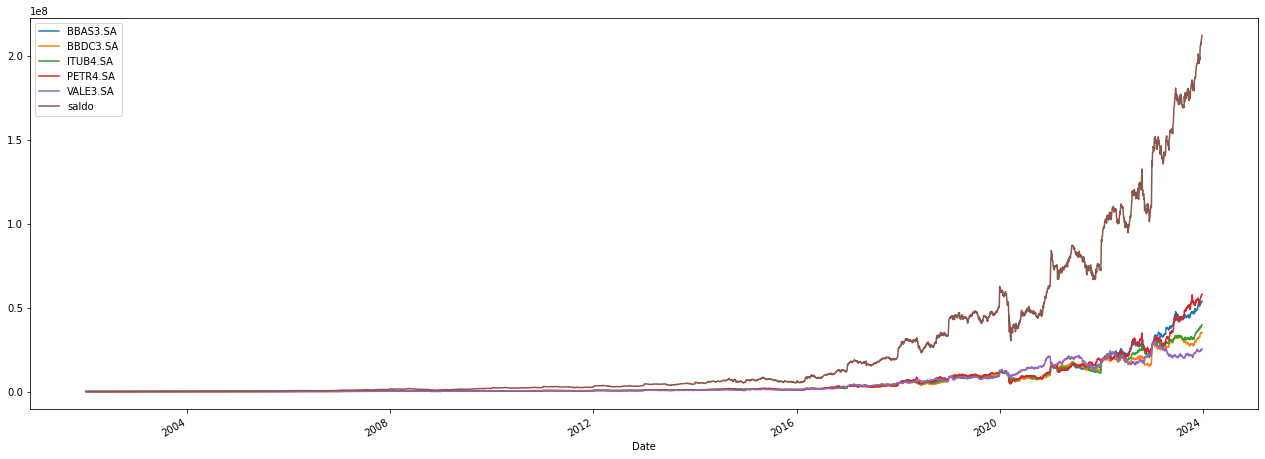

In [12]:
carteira_total.plot(figsize=(22,8))

In [13]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

Date
2002-01-02     50000.000000
2002-01-03     51416.522491
2002-01-04     51658.016148
2002-01-07     51827.422145
2002-01-08     51066.897347
                  ...      
2024-04-29    459025.374856
2024-04-30    453878.316032
2024-05-02    458196.366782
2024-05-03    463195.645905
2024-05-06    463039.531070
Name: Adj Close, Length: 5533, dtype: float64

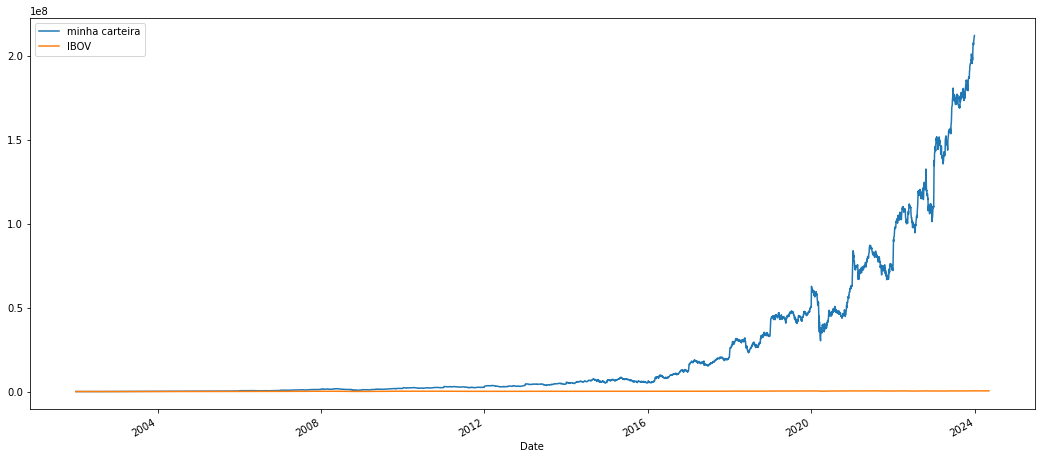

In [14]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado
carteira_total["saldo"].plot(figsize=(18,8), label='minha carteira')
ibov_normalizado.plot(label="IBOV")
plt.legend()